In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

print('Ready')

Ready


In [2]:
def load_data():
    file = 'aircrahesFullDataUpdated_2024.csv'
    df = pd.read_csv(file)
    return df

In [3]:
df = load_data()

In [4]:
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36


In [5]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [6]:
# Sorting the dataframe by the year column in ascending order and resetting index

df = df.sort_values(by='Year', ascending=True)
df.reset_index(drop=True, inplace=True)


In [7]:
df.rename(columns={'Aircraft Manufacturer':'Manufacturer',
                'Country/Region':'Country',
                'Fatalities (air)':'Fatalities'}, 
                inplace=True)

In [8]:
df

,Year,Quarter,Month,Day,Country,Manufacturer,Aircraft,Location,Operator,Ground,Fatalities,Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...
5030,2024,Qtr 1,January,23,NWT Canada,BAe,BAe 3212 Jetstream,Fort Smith,Northwestern Air Lease LTD,0,6,7
5031,2024,Qtr 1,January,18,Somalia,Fokker,Fokker 505YJWG,Ceel Barde,Jetways Airlines,0,1,4
5032,2024,Qtr 1,January,2,Japan,Airbus,Airbus A350-941/de Havilla DHC,Tokyo,Japan Airlines Japan Coast Guard,0,5,385
5033,2024,Qtr 2,May,21,Myanmar,Boeing,Boeing 777-312ER9V-SWM,Over Irrawaddy Basin,Singapore Airllines,0,1,229


In [48]:
df['Manufacturer']

0       Wright Flyer
1             Wright
2         Dirigible?
3           Zeppelin
4           Zeppelin
            ...     
5030             BAe
5031          Fokker
5032          Airbus
5033          Boeing
5034         Douglas
Name: Manufacturer, Length: 5035, dtype: object

In [52]:
# Removing '?' from the aircraft column
df.Aircraft = df.Aircraft.str.replace("?","")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          5035 non-null   int64 
 1   Quarter       5035 non-null   object
 2   Month         5035 non-null   object
 3   Day           5035 non-null   int64 
 4   Country       4805 non-null   object
 5   Manufacturer  5035 non-null   object
 6   Aircraft      5035 non-null   object
 7   Location      5035 non-null   object
 8   Operator      4801 non-null   object
 9   Ground        5035 non-null   int64 
 10  Fatalities    5035 non-null   int64 
 11  Aboard        5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [10]:
df.dtypes

Year             int64
Quarter         object
Month           object
Day              int64
Country         object
Manufacturer    object
Aircraft        object
Location        object
Operator        object
Ground           int64
Fatalities       int64
Aboard           int64
dtype: object

In [11]:
# Checking for any NaN values in any column
df.isnull().any()

Year            False
Quarter         False
Month           False
Day             False
Country          True
Manufacturer    False
Aircraft        False
Location        False
Operator         True
Ground          False
Fatalities      False
Aboard          False
dtype: bool

In [12]:
# Filling all NaN Values in Country column and Operator column to zero
df['Country'] = df['Country'].fillna(0)
df['Operator'] = df['Operator'].fillna(0
)

In [53]:
df

,Year,Quarter,Month,Day,Country,Manufacturer,Aircraft,Location,Operator,Ground,Fatalities,Aboard,Fatality Rate,Total deaths,Survivor
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III,Fort Myer Virginia,Army U.S. - Military,0,1,2,0.500000,1,1
1,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,0,0,1,1,1.000000,1,0
2,1912,Qtr 3,July,12,New,Dirigible,Dirigible,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5,1.000000,5,0
3,1913,Qtr 3,September,9,0,Zeppelin,Zeppelin L 1 (airship),Over the North SeaMilitary - German Navy,0,0,14,20,0.700000,14,6
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship),Near Johannisthal Germany,Navy German - Military,0,28,28,1.000000,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,2024,Qtr 1,January,23,NWT Canada,BAe,BAe 3212 Jetstream,Fort Smith,Northwestern Air Lease LTD,0,6,7,0.857143,6,1
5031,2024,Qtr 1,January,18,Somalia,Fokker,Fokker 505YJWG,Ceel Barde,Jetways Airlines,0,1,4,0.250000,1,3
5032,2024,Qtr 1,January,2,Japan,Airbus,Airbus A350-941/de Havilla DHC,Tokyo,Japan Airlines Japan Coast Guard,0,5,385,0.012987,5,380
5033,2024,Qtr 2,May,21,Myanmar,Boeing,Boeing 777-312ER9V-SWM,Over Irrawaddy Basin,Singapore Airllines,0,1,229,0.004367,1,228


In [14]:
# Fatality Rate Analysis
df['Fatality Rate'] = df['Fatalities'] / df['Aboard']

# Replacing all NaN values with 0
df['Fatality Rate'].fillna(0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11960\23558059.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fatality Rate'].fillna(0, inplace=True)


In [15]:
# Total deaths analysis
df['Total deaths'] = df['Fatalities'] + df['Ground']

In [16]:
# Calculating Number of survivors
df['Survivor'] = df['Aboard'] - df['Fatalities']


In [17]:
df.head(10)

,Year,Quarter,Month,Day,Country,Manufacturer,Aircraft,Location,Operator,Ground,Fatalities,Aboard,Fatality Rate,Total deaths,Survivor
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2,0.500000,1,1
1,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,0,0,1,1,1.000000,1,0
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5,1.000000,5,0
3,1913,Qtr 3,September,9,0,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,0,0,14,20,0.700000,14,6
4,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28,1.000000,28,0
5,1913,Qtr 3,August,6,British,Curtiss,Curtiss seaplane?,Victoria British,Canada Columbia Private,0,1,1,1.000000,1,0
6,1915,Qtr 3,September,3,Germany,Zeppelin,Zeppelin L 10 (airship)?,Off Cuxhaven Germany,Navy German - Military,0,19,19,1.000000,19,0
7,1915,Qtr 1,March,5,Belgium,Zeppelin,Zeppelin L 8 (airship)?,Tienen Belgium,Navy German - Military,0,17,41,0.414634,17,24
8,1916,Qtr 3,July,28,Bulgeria,Schutte,Schutte Lanz S,Near Jambol Bulgeria,Army German - Military,0,20,20,1.000000,20,0
9,1916,Qtr 4,November,28,England,Zeppelin,Zeppelin L 34 (airship)?,Off West Hartlepool England,Navy German - Military,0,20,20,1.000000,20,0


In [18]:
# Displaying Specific columns in the dataframe

df[['Year', 'Month', 'Day', 'Country', "Aircraft", 'Operator','Ground','Fatalities', 'Aboard','Fatality Rate','Total deaths', 'Survivor']].head(10)

,Year,Month,Day,Country,Aircraft,Operator,Ground,Fatalities,Aboard,Fatality Rate,Total deaths,Survivor
0,1908,September,17,Virginia,Wright Flyer III?,Army U.S. - Military,0,1,2,0.500000,1,1
1,1909,September,7,France?,Wright ByplaneSC1,0,0,1,1,1.000000,1,0
2,1912,July,12,New,Dirigible?,Navy U.S. - JerseyMilitary,0,5,5,1.000000,5,0
3,1913,September,9,0,Zeppelin L 1 (airship)?,0,0,14,20,0.700000,14,6
4,1913,October,17,Germany,Zeppelin L 2 (airship)?,Navy German - Military,0,28,28,1.000000,28,0
5,1913,August,6,British,Curtiss seaplane?,Canada Columbia Private,0,1,1,1.000000,1,0
6,1915,September,3,Germany,Zeppelin L 10 (airship)?,Navy German - Military,0,19,19,1.000000,19,0
7,1915,March,5,Belgium,Zeppelin L 8 (airship)?,Navy German - Military,0,17,41,0.414634,17,24
8,1916,July,28,Bulgeria,Schutte Lanz S,Army German - Military,0,20,20,1.000000,20,0
9,1916,November,28,England,Zeppelin L 34 (airship)?,Navy German - Military,0,20,20,1.000000,20,0


# EDA (EXPLORATORY DATA ANALYSIS)

In [19]:
# Total number of crashes per year
crash_per_year = df.groupby('Year').size()

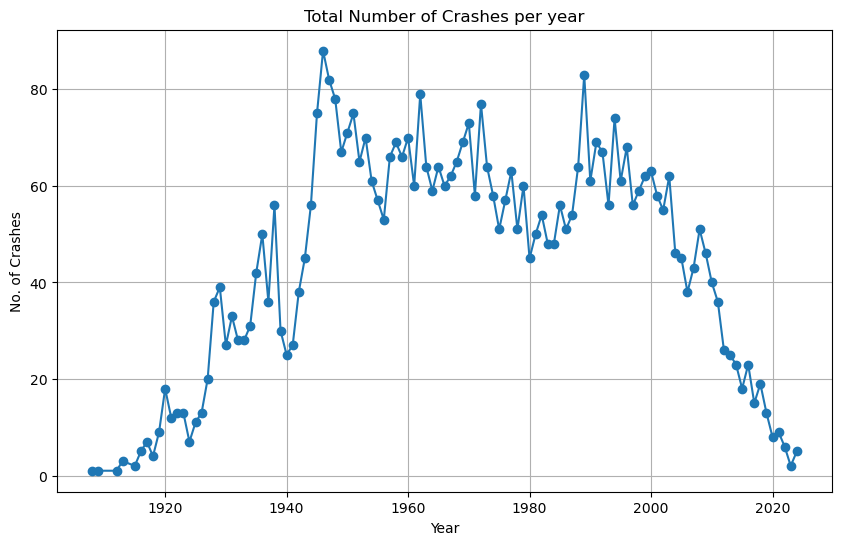

In [20]:
# Analysis plot
plt.figure(figsize=(10,6))
plt.plot(crash_per_year.index, crash_per_year.values, marker='o')
plt.title('Total Number of Crashes per year')
plt.xlabel('Year')
plt.ylabel('No. of Crashes')
plt.grid(True)
plt.show()


In [21]:
# Analyzing Crashes per month
crash_per_month = df.groupby('Month').size().sort_values(ascending=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11960\2047261565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crash_per_month.index, y= crash_per_month.values, palette='viridis')


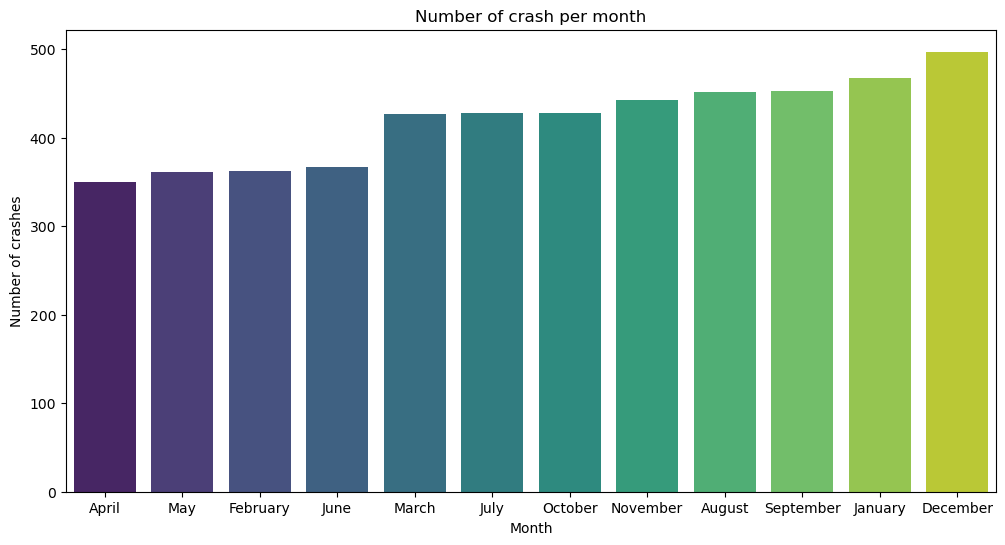

In [22]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=crash_per_month.index, y= crash_per_month.values, palette='viridis')
plt.title('Number of crash per month')
plt.xlabel("Month")
plt.ylabel('Number of crashes')
plt.show()

In [23]:
# Fatality per Year Analysis
fatalities_per_year= df.groupby('Year')['Fatalities'].sum()

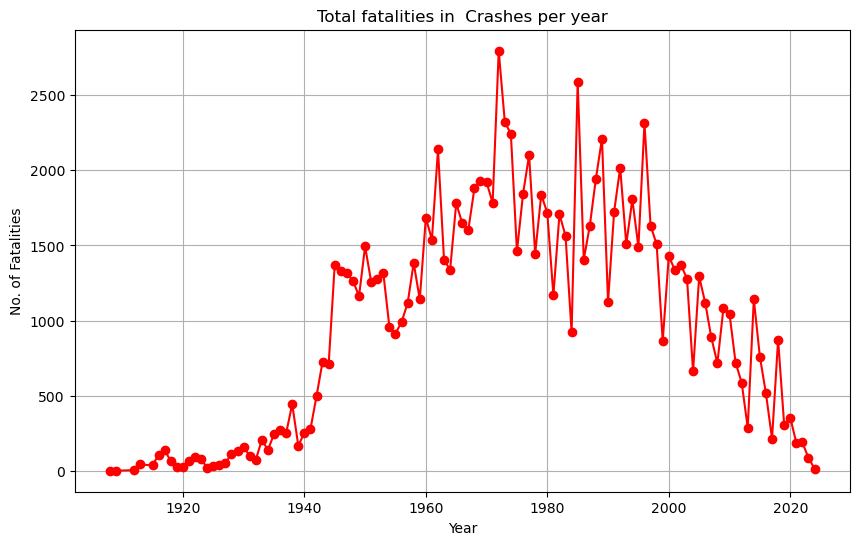

In [47]:
# Plot of the Analysis
plt.figure(figsize=(10,6))
plt.plot(fatalities_per_year.index, fatalities_per_year.values, color = 'Red', marker='o')
plt.title('Total fatalities in  Crashes per year')
plt.xlabel('Year')
plt.ylabel('No. of Fatalities')
plt.grid(True)
plt.show()

In [25]:
# Analyzing the crash rate by aircraft
crash_by_aircraft = df['Aircraft'].value_counts().head(10
                                                       )

C:\Users\Admin\AppData\Local\Temp\ipykernel_11960\1966553950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crash_by_aircraft.index, y=crash_by_aircraft.values, palette='magma')


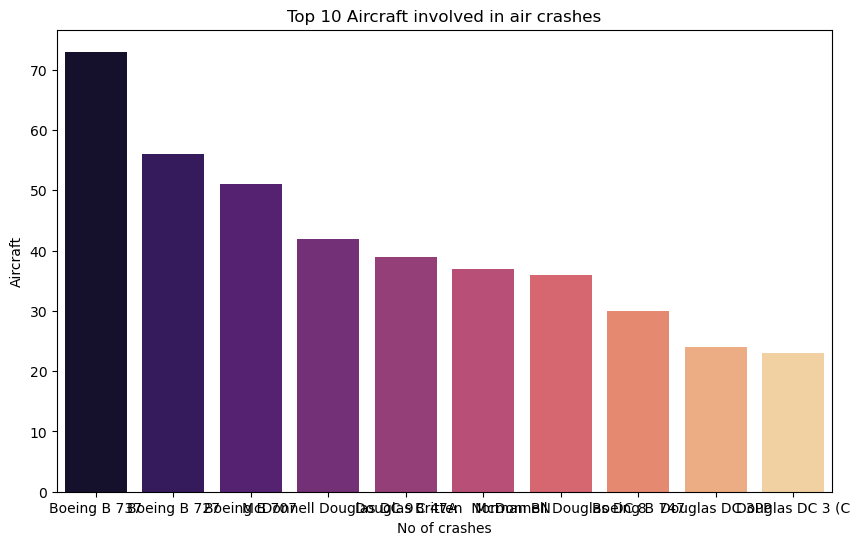

In [26]:
# Plotting the analysis
plt.figure(figsize=(10,6))
sns.barplot(x=crash_by_aircraft.index, y=crash_by_aircraft.values, palette='magma')
plt.title('Top 10 Aircraft involved in air crashes')
plt.xlabel('No of crashes')
plt.ylabel('Aircraft')
plt.show()

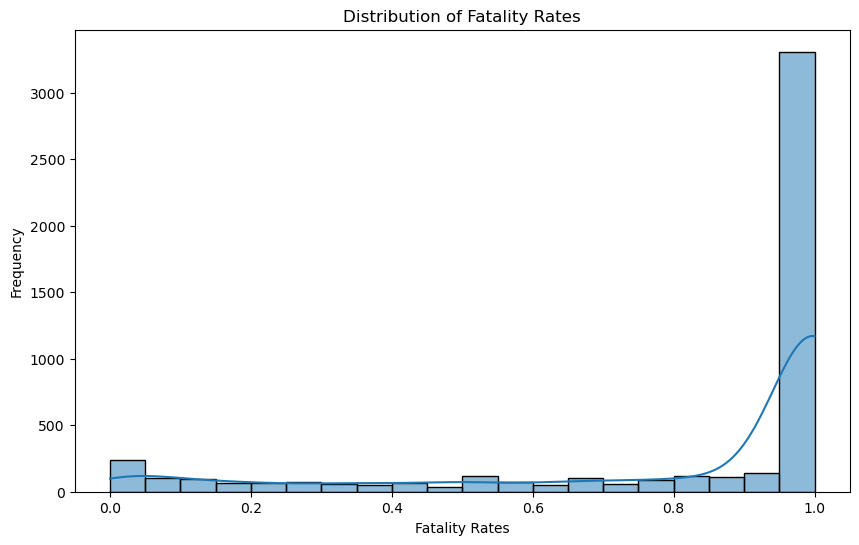

In [27]:
#Plotting for Fatality rate Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Fatality Rate'], bins=20, kde=True)
plt.title('Distribution of Fatality Rates')
plt.xlabel('Fatality Rates')
plt.ylabel('Frequency')
plt.show()

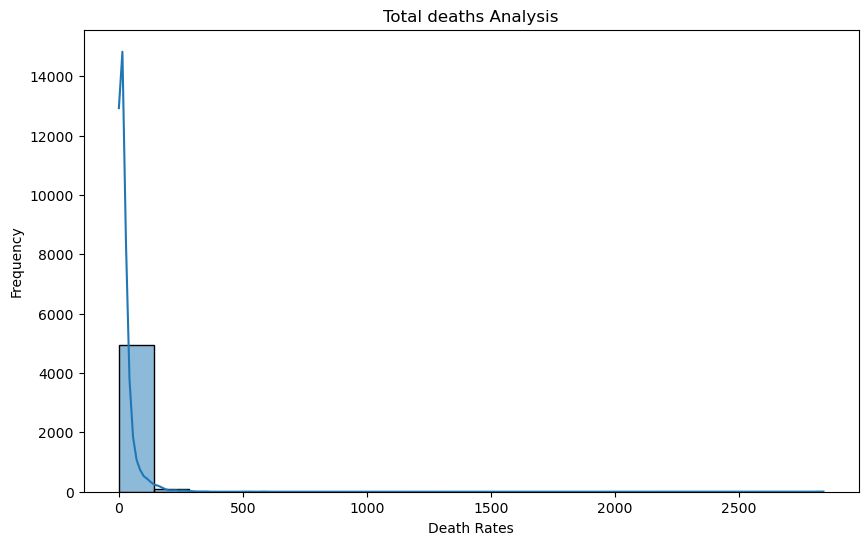

In [28]:
# Plotting the total deaths analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Total deaths'], bins=20, kde=True)
plt.title('Total deaths Analysis')
plt.xlabel('Death Rates')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Statistical Analysis
# Calculating the correlation between number of people Aboard and Fatalities

correlation = df[['Aboard','Fatalities']].corr()

In [30]:
print(correlation)

              Aboard  Fatalities
Aboard      1.000000    0.732486
Fatalities  0.732486    1.000000


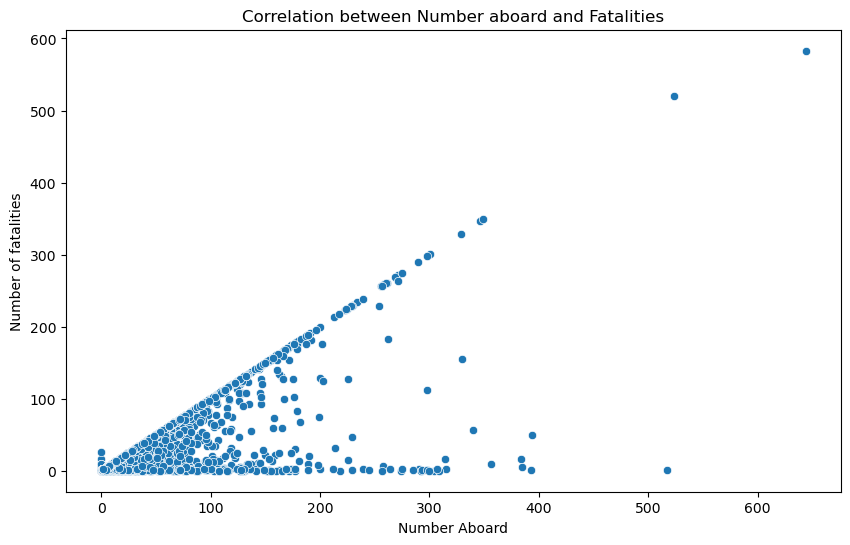

In [31]:
# Correlation analysis plot
plt.figure(figsize=(10,6))
sns.scatterplot(data= df, x="Aboard", y="Fatalities" )
plt.title("Correlation between Number aboard and Fatalities")
plt.xlabel('Number Aboard')
plt.ylabel("Number of fatalities")
plt.show()

In [32]:
# Calculating the mean rate of fatalities rate, total deaths, Aboard
Mean = df[['Fatality Rate','Total deaths', 'Aboard','Fatalities','Ground']].mean()

In [33]:
print(Mean)

Fatality Rate          inf
Total deaths     23.923337
Aboard           31.107249
Fatalities       22.218868
Ground            1.704469
dtype: float64


In [34]:
# Analyzing the median rate of fatalities...
Median = df[['Fatality Rate','Total deaths', 'Aboard','Fatalities','Ground']].median()

In [35]:
print(f"Media Number is: {Median}")

Media Number is: Fatality Rate     1.0
Total deaths     12.0
Aboard           16.0
Fatalities       11.0
Ground            0.0
dtype: float64


In [36]:
# Calculating the variance and standard deviation
Variance = df[['Fatality Rate','Total deaths', 'Aboard','Fatalities','Ground']].var()

In [37]:
print(Variance)

Fatality Rate            NaN
Total deaths     4382.879700
Aboard           2092.164498
Fatalities       1221.427653
Ground           3036.573748
dtype: float64


In [38]:
# Calculating the Standard deviation 
Standard_Deviation = df[['Fatality Rate','Total deaths', 'Aboard','Fatalities','Ground']].std()

In [39]:
print(Standard_Deviation)

Fatality Rate          NaN
Total deaths     66.203321
Aboard           45.740185
Fatalities       34.948929
Ground           55.105115
dtype: float64


In [40]:
# Creating a new dataframe to get the correlation Analysis
df2 = df[['Fatality Rate','Total deaths', 'Aboard','Fatalities','Ground']]

In [41]:
df2.corr()

,Fatality Rate,Total deaths,Aboard,Fatalities,Ground
Fatality Rate,1.000000,0.124903,-0.218013,0.221367,0.009681
Total deaths,0.124903,1.000000,0.403442,0.554889,0.849477
Aboard,-0.218013,0.403442,1.000000,0.732486,0.020136
Fatalities,0.221367,0.554889,0.732486,1.000000,0.032421
Ground,0.009681,0.849477,0.020136,0.032421,1.000000


Text(0.5, 1.0, 'Air crashes Correlation Matrix')

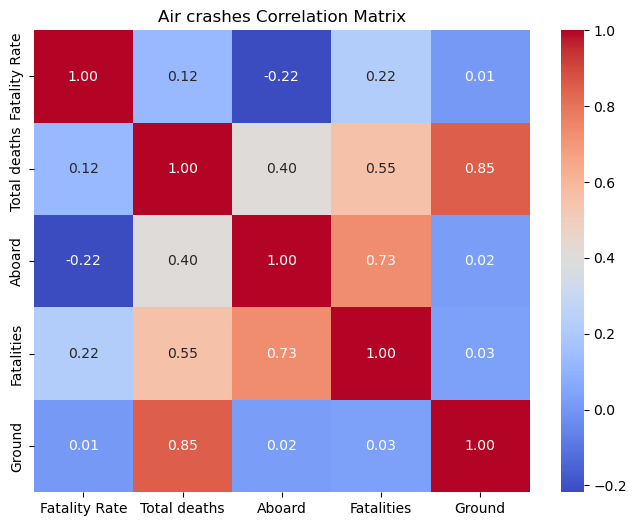

In [42]:
 # plotting the heatmap for the new dataframe

plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(),annot=True,
             cmap = 'coolwarm', fmt=".2f")
plt.title('Air crashes Correlation Matrix')

In [43]:
#Summary of statistics
print(df2.describe())

       Fatality Rate  Total deaths       Aboard   Fatalities       Ground
count    5035.000000   5035.000000  5035.000000  5035.000000  5035.000000
mean             inf     23.923337    31.107249    22.218868     1.704469
std              NaN     66.203321    45.740185    34.948929    55.105115
min         0.000000      0.000000     0.000000     0.000000     0.000000
25%         0.744365      4.000000     7.000000     4.000000     0.000000
50%         1.000000     12.000000    16.000000    11.000000     0.000000
75%         1.000000     26.000000    34.500000    25.000000     0.000000
max              inf   2842.000000   644.000000   583.000000  2750.000000


In [44]:
print(df.describe())

              Year          Day       Ground   Fatalities       Aboard  \
count  5035.000000  5035.000000  5035.000000  5035.000000  5035.000000   
mean   1970.991063    15.785104     1.704469    22.218868    31.107249   
std      24.814467     8.794474    55.105115    34.948929    45.740185   
min    1908.000000     1.000000     0.000000     0.000000     0.000000   
25%    1951.000000     8.000000     0.000000     4.000000     7.000000   
50%    1970.000000    16.000000     0.000000    11.000000    16.000000   
75%    1992.000000    23.000000     0.000000    25.000000    34.500000   
max    2024.000000    31.000000  2750.000000   583.000000   644.000000   

       Fatality Rate  Total deaths     Survivor  
count    5035.000000   5035.000000  5035.000000  
mean             inf     23.923337     8.888381  
std              NaN     66.203321    31.172605  
min         0.000000      0.000000   -26.000000  
25%         0.744365      4.000000     0.000000  
50%         1.000000     12.00000

## Research Questions

##### 1. Which Country have the highest number of air crashes?
##### 2. Which Aircraft models have the highest number of crashes?
##### 3. Are there specific airport locations associated with a higher number of crashes?
##### 4. What is the average rate of fatalities per crash..?
##### 5. 
        